# TITANIC DATASET PREDICTION

# PRESENTED BY: HAMNA QASEEM

# IMPORTING ALL NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# DATA COLLECTION AND PROCESSING

In [2]:
#load data from csv file to Pandas DataFrame
titanic_data=pd.read_csv('train.csv')

In [3]:
#printing the first five rows of dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#number of rows and columns
titanic_data.shape

(891, 12)

In [5]:
#getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
#check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling The Missing Values

In [7]:
#drop cabin column from dataset
titanic_data=titanic_data.drop(columns='Cabin', axis=1)

In [8]:
# replacing the missing values in 'Age' column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [9]:
# finding the mode value of 'Embarked' column
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [10]:
print(titanic_data['Embarked'].mode()[0])

S


In [11]:
# replace missing values in 'Embarked' column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [12]:
#check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# DATA ANALYSIS

In [13]:
# Getting some statistical measures about data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# finding the number of people survived or not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# DATA VISUALIZATION

In [15]:
sns.set()

C:\Users\Silicon computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

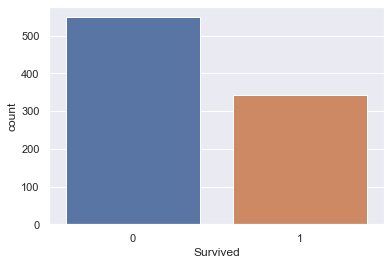

In [16]:
# making a count plot for 'Survived' column
sns.countplot('Survived', data=titanic_data)

In [17]:
# making a count plot for 'Sex' column
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\Silicon computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

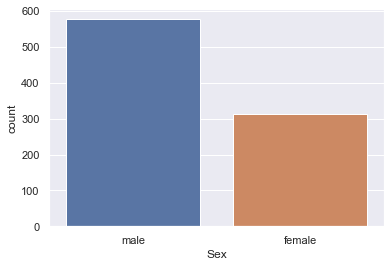

In [18]:
# making a count plot for 'Sex' column
sns.countplot('Sex', data=titanic_data)

C:\Users\Silicon computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

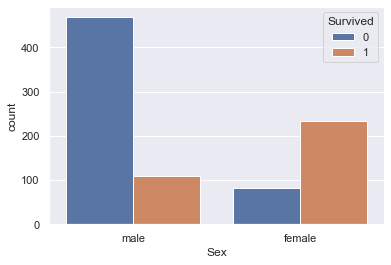

In [19]:
# number of survivors gender vise
sns.countplot('Sex', hue='Survived', data=titanic_data)

C:\Users\Silicon computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

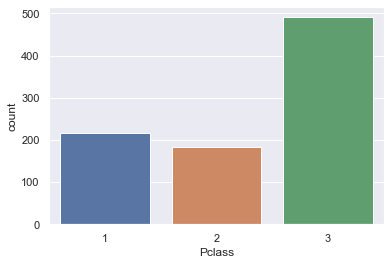

In [20]:
# making a count plot for 'Pclass' column
sns.countplot('Pclass', data=titanic_data)

C:\Users\Silicon computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

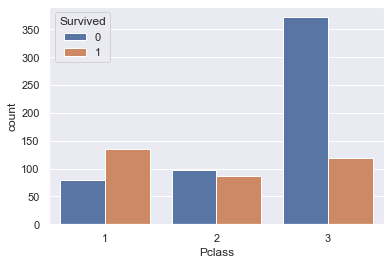

In [21]:
sns.countplot('Pclass', hue='Survived', data=titanic_data)

In [ ]:
# SUMMARY OF THIS WHOLE DATASET IS:
We have Training And Test Data and we Train the model and after that we Test it and make prediction on Target feature that is "Survived".
We Predict that how many passengers in Titanic was Survived and what was the distribution of Genders. More Passengers were Females or Males.

# ENCODING THE CATEGORICAL COLUMN

In [22]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
# converting categorical columns
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# SEPARATING FEATURES AND TARGET

In [26]:
X=titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket','Survived'], axis=1)
y=titanic_data['Survived']

In [27]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [28]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# SPLITTING DATA INTO TRAINING DATA AND TEST DATA

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_test.shape, X_train.shape)

(891, 7) (179, 7) (712, 7)


# MODEL TRAINING

# LOGISTIC REGRESSION MODEL

In [31]:
model=LogisticRegression()

In [32]:
#Training logistic regression model with training data
model.fit(X_train, y_train)

C:\Users\Silicon computers\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# MODEL EVALUATION

# ACCURACY SCORE

In [33]:
# Accuracy on training data
X_train_prediction=model.predict(X_train)

In [34]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [35]:
training_data_accuracy=accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data :', training_data_accuracy)

Accuracy score of training data : 0.8075842696629213


In [36]:
# Accuracy on test data
X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [37]:
test_data_accuracy=accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data :', test_data_accuracy)

Accuracy score of test data : 0.7821229050279329


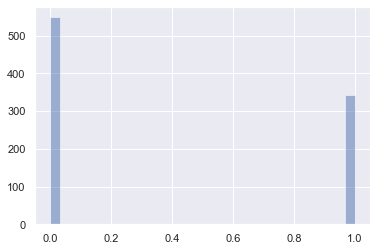

In [39]:
titanic_data.Survived.hist(bins=30, alpha=0.5)
plt.show()

# THE END!
          THANKyOU

# TITANIC DATA SET:

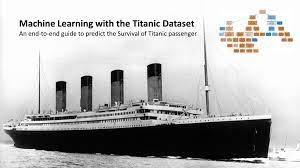

# OVERVIEW OF ENTIRE DATASET:

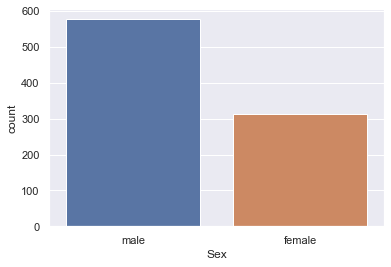

In [40]:
# making a count plot for 'Sex' column
titanic_data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

###  After analyzing, from this graph we evaluate that huge amount of Males who were affected in Titanic Disaster. From 891 people 577 were Males who were died or not survived. And remaining were Females count of 314 who were Survived.

# EVALUATION THROUGH CLASS WISE:

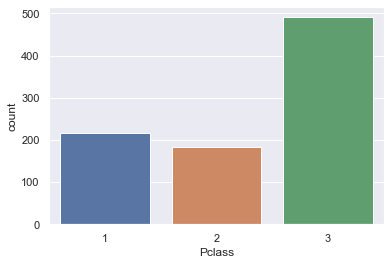 

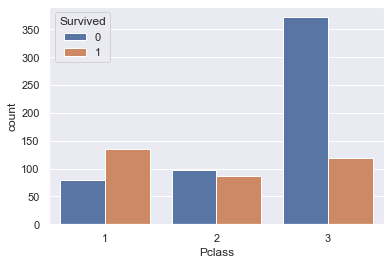

### We can Evaluate that most of the Passengers were from 3rd class. And most passengers were affected in Disasters frpm Pclass 3.
### And the amount of male gender were affected most as compared to Females. 
#### In Pclass 1 most of the passengers were Survived
#### In Pclass 2 the ratio between Survived and Not Survived Passenger is too short.The amount of Survived Passengers is bit low.
#### In Pclass 3 the ratio between Survived and Not Survived Passenger is too high. Most passengers were affected in this class. 

# CONCLUSION:

### So we can conclude that the Death rate of Male Gender is more as compared to females in Titanic Disaster 

# THE END!!
   THANKyOU....